<h3>Какие основные характеристики больше всего влияют на цену автомобиля?</h3>

<h2 id="import_data">1. Импорт данных из Lab: 2</h2>

In [5]:
import pandas as pd
import matplotlib.pylab as plt

In [6]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2 id="pattern_visualization">2. Анализ отдельных шаблонов признаков с помощью визуализации</h2>



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h4>Как выбрать правильный метод визуализации?</h4>
<p>При визуализации отдельных переменных важно сначала понять, с каким типом переменной вы имеете дело. Это поможет нам найти правильный метод визуализации для этой переменной.</p>



In [8]:
# список типов данных для каждого столбца
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


Например, мы можем вычислить корреляцию между переменными типа «int64» или «float64», используя метод «corr»:

In [9]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Диагональные элементы всегда равны '1'; мы более подробно изучим корреляцию, корреляцию Пирсона, в конце блокнота.

<h4>Найдите соотношение между следующими столбцами: диаметр цилиндра, ход поршня, степень сжатия и мощность </h4>

In [11]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2>Непрерывные числовые переменные:</h2>

<p>Непрерывные числовые переменные — это переменные, которые могут содержать любое значение в пределах некоторого диапазона. Они могут быть типа "int64" или "float64". Отличный способ визуализировать эти переменные — использовать диаграммы рассеяния с подогнанными линиями.</p>

<p>Чтобы понять (линейную) связь между отдельной переменной и ценой, мы можем использовать "regplot", который строит диаграмму рассеяния плюс подобранную линию регрессии для данных.</p>

<h3>Положительная линейная связь</h3>

Давайте найдем диаграмму рассеяния «объем двигателя» и «цена»

(0.0, 53538.36612049817)

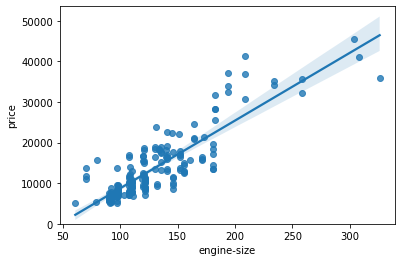

In [12]:
# Объем двигателя как потенциальный предиктор цены
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>По мере увеличения объема двигателя растет и цена: это указывает на прямую положительную корреляцию между этими двумя переменными. Объем двигателя кажется довольно хорошим предсказателем цены, поскольку линия регрессии представляет собой почти идеальную диагональную линию.</p>

Мы можем изучить корреляцию между «объемом двигателя» и «ценой» и увидеть, что она составляет примерно 0,87.

In [13]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Миля на галлон по шоссе — это потенциальный предиктор цены. Давайте найдем диаграмму рассеяния «шоссе-миль на галлон» и «цена».

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

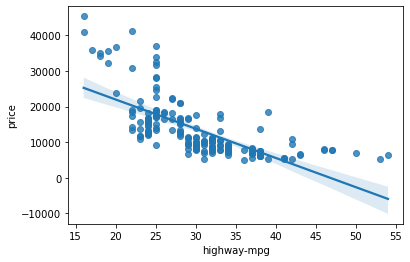

In [14]:
sns.regplot(x="highway-mpg", y="price", data=df)

Когда расход на галлон растет, цена падает: это указывает на обратную/отрицательную связь между этими двумя переменными. Расход на галлон по шоссе потенциально может быть предиктором цены.

Мы можем изучить корреляцию между «миль на галлон» и «ценой» и увидеть, что она составляет приблизительно -0,704.

In [15]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Слабая линейная связь</h3>

Давайте посмотрим, является ли «peak-rpm» переменной-предиктором «цены».

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

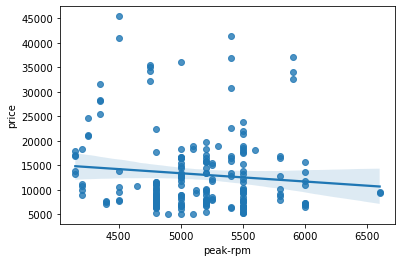

In [16]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Пиковые обороты вообще не кажутся хорошим предсказателем цены, поскольку линия регрессии близка к горизонтальной. Кроме того, точки данных сильно разбросаны и далеки от подобранной линии, что свидетельствует о большой изменчивости. Следовательно, это ненадежная переменная.</p>

Мы можем изучить корреляцию между «пиковыми оборотами» и «ценой» и увидеть, что она составляет примерно -0,101616.

In [17]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<h4>Найдите корреляцию между x="stroke" and y="price".</h4>

Корреляция 0,0823, недиагональные элементы таблицы

In [18]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<h4>Учитывая результаты корреляции между «price» и «stroke», ожидаете ли вы линейную зависимость?</h4>

<AxesSubplot:xlabel='stroke', ylabel='price'>

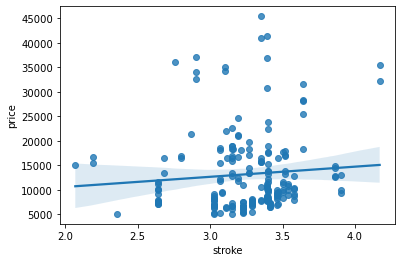

In [19]:
 sns.regplot(x="stroke", y="price", data=df)

Существует слабая корреляция между переменными «stroke» и «price». поскольку такая регрессия не будет работать хорошо. Мы можем увидеть это, используя «regplot», чтобы продемонстрировать это.

<h3>Категориальные переменные</h3>

<p>Это переменные, которые описывают "характеристики" единицы данных и выбираются из небольшой группы категорий. Категориальные переменные могут иметь тип «object» или «int64». Хороший способ визуализировать категориальные переменные — использовать Box Plot.</p>

Давайте посмотрим на взаимосвязь между «типом кузова» и «ценой».

<AxesSubplot:xlabel='body-style', ylabel='price'>

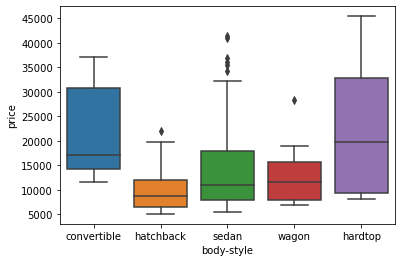

In [20]:
sns.boxplot(x="body-style", y="price", data=df)

Мы видим, что распределения цен между различными категориями телосложения значительно перекрываются, поэтому тип кузова не может быть хорошим предиктором цены. Рассмотрим "местоположение двигателя" и "цена":

<AxesSubplot:xlabel='engine-location', ylabel='price'>

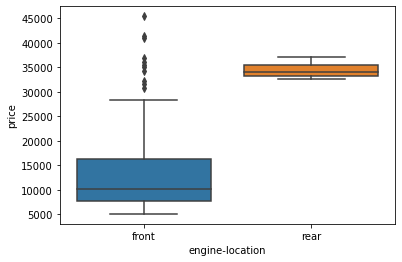

In [21]:
sns.boxplot(x="engine-location", y="price", data=df)

Здесь мы видим, что распределение цены между этими двумя категориями расположения двигателя, передним и задним, достаточно различается, чтобы рассматривать расположение двигателя в качестве потенциально хорошего предиктора цены.

Рассмотрим «привод» и «цену».

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

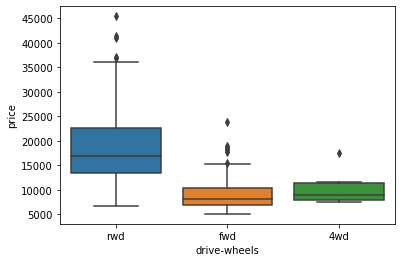

In [22]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Здесь мы видим, что распределение цены между разными категориями ведущих колес различается. Таким образом, ведущие колеса потенциально могут быть предиктором цены.

<h2 id="discriptive_statistics">3. Описательный статистический анализ</h2>

<p>Давайте сначала рассмотрим переменные, используя метод описания.</p>

<p>Функция <b>describe</b> автоматически вычисляет базовую статистику для всех непрерывных переменных. Любые значения NaN автоматически пропускаются в этой статистике.</p>

Функция покажет:

<ul>
     <li>количество этой переменной</li>
     <li>среднее</li>
     <li>стандартное отклонение (std)</li>
     <li>минимальное значение</li>
     <li>IQR (межквартильный диапазон: 25 %, 50 % и 75 %)</li>
     <li>максимальное значение</li>
<ul>

In [23]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Значение 'describe' по умолчанию пропускает переменные типа 'object'. Мы можем применить метод 'describe' к переменным типа 'object' следующим образом:

In [24]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h3>Значения ценности</h3>

<p>Подсчет значений — это хороший способ понять, сколько единиц каждой характеристики/переменной у нас есть. Мы можем применить метод «value_counts» к столбцу «ведущие колеса». Не забывайте, что метод «value_counts» работает только с сериями pandas, а не с кадрами данных pandas. В результате мы включаем только одну скобку <code>df['ведущие колеса']</code>, а не две скобки <code>df[['ведущие колеса']]</code>.</p>

In [25]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Мы можем преобразовать серию в фрейм данных следующим образом:

In [26]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Давайте повторим описанные выше шаги, но сохраним результаты во фрейме данных «drive_wheels_counts» и переименуем столбец «drive-wheels» в «value_counts».

In [28]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Теперь давайте переименуем индекс в 'drive-wheels':

In [29]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Мы можем повторить описанный выше процесс для переменной «engine-location».

In [30]:
# engine-location как переменная
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Изучив подсчет значений местоположения двигателя, мы видим, что местоположение двигателя не может быть хорошим предиктором цены. Это потому, что у нас есть только три автомобиля с задним расположением двигателя и 198 с передним расположением двигателя, так что этот результат искажен. Таким образом, мы не можем делать какие-либо выводы о расположении двигателя.

<h2 id="basic_grouping">4. Основы группировки</h2>

<p>Метод 'groupby' группирует данные по разным категориям. Данные группируются на основе одной или нескольких переменных, и выполняется анализ отдельных групп.</p>

<p>Например, сгруппируем по переменной "ведущие колеса". Мы видим, что есть 3 разные категории ведущих колес.</p>

In [31]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>Если мы хотим узнать в среднем, какой тип ведущего колеса является наиболее ценным, мы можем сгруппировать «ведущие колеса», а затем усреднить их.</p>

<p>Мы можем выбрать столбцы "ведущие колеса", "тип кузова" и "цена", а затем назначить их переменной "df_group_one".</p>

In [32]:
df_group_one = df[['drive-wheels','body-style','price']]

Затем мы можем рассчитать среднюю цену для каждой из различных категорий данных.

In [33]:
# группировка результатов
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>По нашим данным, автомобили с задним приводом в среднем самые дорогие, а полноприводные и переднеприводные стоят примерно одинаково.</p>

<p>Вы также можете группировать по нескольким переменным. Например, давайте сгруппируем по «ведущим колесам» и «стилю кузова». Это группирует кадр данных по уникальной комбинации «ведущих колес» и «стиля кузова». Мы можем сохранить результаты в переменной 'grouped_test1'.</p>

In [34]:
# группировка результатов
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>Эти сгруппированные данные намного проще визуализировать, если они представлены в виде сводной таблицы. Сводная таблица похожа на электронную таблицу Excel с одной переменной в столбце и другой в строке. Мы можем преобразовать фрейм данных в сводную таблицу, используя метод «pivot», чтобы создать сводную таблицу из групп.</p>

<p>В этом случае мы оставим переменную приводных колес в качестве строк таблицы, а стиль тела поворота станет столбцами таблицы:</p>

In [35]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Часто у нас не будет данных для некоторых опорных ячеек. Мы можем заполнить эти отсутствующие ячейки значением 0, но потенциально можно использовать и любое другое значение. Следует отметить, что отсутствующие данные — довольно сложная тема, которая представляет собой отдельный курс.

In [36]:
grouped_pivot = grouped_pivot.fillna(0) # заполнить пропущенные значения с помощью 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<h4>Используйте функцию «groupby», чтобы найти среднюю «цену» каждого автомобиля на основе «типа кузова»</h4>

In [38]:
# группировка результатов
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<h4>Переменные: ведущие колеса и тип кузова по сравнению с ценой</h4>

Давайте используем тепловую карту, чтобы визуализировать взаимосвязь между стилем кузова и ценой.

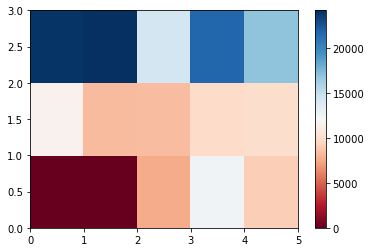

In [39]:
# использовать сгруппированные результаты
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>Тепловая карта отображает целевую переменную (цену), пропорциональную цвету, по отношению к переменным "ведущее колесо" и "форма кузова" по вертикальной и горизонтальной осям соответственно. Это позволяет нам визуализировать, как цена связана с «ведущим колесом» и «типом кузова».</p>

<p>Ярлыки по умолчанию не несут нам никакой полезной информации. Давайте изменим это:</p>

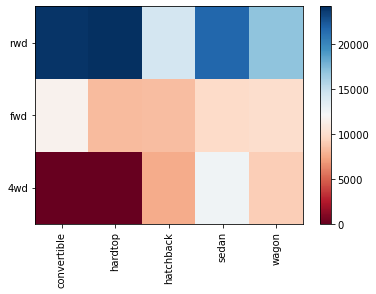

In [41]:
import numpy as np

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# названия ярлыков
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# переместить галочки и метки в центр
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# вставить ярлыки
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# повернуть метку, если она слишком длинная
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Визуализация очень важна в науке о данных, и пакеты визуализации Python предоставляют большую свободу. Мы углубимся в отдельный курс по визуализации Python.</p>

<p>Основной вопрос, на который мы хотим ответить в этом модуле: "Какие основные характеристики больше всего влияют на цену автомобиля?".</p>

<p>Чтобы лучше оценить важные характеристики, мы рассмотрим корреляцию этих переменных с ценой автомобиля. Другими словами: как цена автомобиля зависит от этой переменной?</p>

<h2 id="correlation_causation">5. Корреляция и причинность</h2>

<p><b>Корреляция</b>: мера степени взаимозависимости между переменными.</p>

<p><b>Причинно-следственная связь</b>: взаимосвязь между причиной и следствием между двумя переменными.</p>

<p>Важно знать разницу между ними. Корреляция не подразумевает причинно-следственной связи. Определить корреляцию гораздо проще, чем установить причинно-следственную связь, поскольку для ее установления может потребоваться независимое экспериментирование.</p>

<p><b>Корреляция Пирсона</b></p>
<p>Корреляция Пирсона измеряет линейную зависимость между двумя переменными X и Y.</p>
<p>Результирующий коэффициент представляет собой значение от -1 до 1 включительно, где:</p>
<ul>
     <li><b>1</b>: идеальная положительная линейная корреляция.</li>
     <li><b>0</b>: нет линейной корреляции, две переменные, скорее всего, не влияют друг на друга.</li>
     <li><b>-1</b>: идеальная отрицательная линейная корреляция.</li>
</ul>

<p>Корреляция Пирсона — это метод по умолчанию для функции "corr". Как и раньше, мы можем вычислить корреляцию Пирсона для переменных 'int64' или 'float64'.</p>

In [42]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Иногда мы хотели бы знать значимость оценки корреляции.

<b>P-value</b>

<p>Что такое P-value? P-value — это значение вероятности того, что корреляция между этими двумя переменными является статистически значимой. Обычно мы выбираем уровень значимости 0,05, что означает, что мы на 95 % уверены в значимости корреляции между переменными.</p>

По соглашению, когда

<ul>
     <li>p-value $<$ 0,001: мы говорим, что есть убедительные доказательства того, что корреляция значительна.</li>
     <li>p-value $<$ 0,05: есть умеренные доказательства значимости корреляции.</li>
     <li>p-value $<$ 0,1: есть слабые доказательства того, что корреляция значительна.</li>
     <li>p-value $>$ 0,1: нет никаких доказательств того, что корреляция значительна.</li>
</ul>

Мы можем получить эту информацию, используя модуль «stats» в библиотеке «scipy».

In [43]:
from scipy import stats

<h3>Колесная база и цена</h3>

Давайте рассчитаем коэффициент корреляции Пирсона и P-значение «колесной базы» и «цены».

In [44]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


<h4>Вывод:</h4>
<p>Поскольку p-value составляет $<$ 0,001, корреляция между колесной базой и ценой статистически значима, хотя линейная зависимость не очень сильная (~0,585).</p>

<h3>Мощность и цена</h3>

Давайте рассчитаем коэффициент корреляции Пирсона и P-значение «лошадиных сил» и «цены».

In [45]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259557e-48


<h4>Вывод:</h4>

<p>Поскольку p-value составляет $<$ 0,001, корреляция между мощностью и ценой статистически значима, а линейная зависимость довольно сильная (~0,809, близко к 1).</p>

<h3>Длина и цена</h3>

Давайте рассчитаем коэффициент корреляции Пирсона и P-значение «длины» и «цены».

In [46]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158986e-30


<h4>Вывод:</h4>
<p>Поскольку p-value составляет $<$ 0,001, корреляция между длиной и ценой является статистически значимой, а линейная зависимость умеренно сильной (~0,691).</p>

<h3>Ширина и цена</h3>

Давайте рассчитаем коэффициент корреляции Пирсона и P-значение «ширины» и «цены»:

In [47]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38


<h4>Вывод:</h4>
<p>Поскольку p-значение <0,001, корреляция между шириной и ценой статистически значима, а линейная зависимость довольно сильная (~0,751).</p>

### Снаряженная масса и цена

Давайте рассчитаем коэффициент корреляции Пирсона и P-значение «собственного веса» и «цены»:

In [50]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P =  2.189577238893816e-53


<h4>Вывод:</h4>
<p>Поскольку p-значение составляет $<$ 0,001, корреляция между снаряженной массой и ценой статистически значима, а линейная зависимость довольно сильная (~0,834).</p>

<h3>Диаметр и цена</h3>

In [51]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


<h4>Вывод:</h4>
<p>Поскольку p-значение составляет $<$ 0,001, корреляция между диаметром отверстия и ценой статистически значима, но линейная зависимость является умеренной (~0,521).</p>

<h3>Городские мили на галлон и цена</h3>

In [52]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29


<h4>Вывод:</h4>
<p>Поскольку p-значение составляет $<$ 0,001, корреляция между миль на галлон и ценой является статистически значимой, а коэффициент около -0,687 показывает, что связь отрицательная и умеренно сильная.</p>

<h3>Расход на галлон и цена</h3>

In [54]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


#### Вывод:

Поскольку p-значение <0,001, корреляция между расходом топлива на галлон и ценой является статистически значимой, а коэффициент около -0,705 показывает, что связь отрицательная и умеренно сильная.

<h2 id="anova">6. Дисперсионный анализ</h2>

<h3>ANOVA: дисперсионный анализ</h3>
<p>Дисперсионный анализ (ANOVA) – это статистический метод, используемый для проверки наличия существенных различий между средними значениями двух или более групп. Дисперсионный анализ возвращает два параметра:</p>

<p><b>Показатель F-теста</b>: ANOVA предполагает, что средние значения для всех групп одинаковы, вычисляет, насколько фактические средние значения отклоняются от предположения, и сообщает об этом как показатель F-теста. Чем выше балл, тем больше разница между средними значениями.</p>

<p><b>P-value</b>: P-значение говорит о том, насколько статистически значимо наше вычисленное значение.</p>

<p>Если наша ценовая переменная сильно коррелирует с анализируемой переменной, мы ожидаем, что дисперсионный анализ даст значительную оценку F-теста и небольшое значение p.</p>

<h3>Ведущие колеса</h3>

<p>Поскольку дисперсионный анализ анализирует разницу между различными группами одной и той же переменной, вам пригодится функция groupby. Поскольку алгоритм ANOVA усредняет данные автоматически, нам не нужно заранее вычислять среднее значение.</p>

<p>Чтобы увидеть, влияют ли различные типы «ведущих колес» на «цену», мы группируем данные.</p>

In [56]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [57]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


Мы можем получить значения группы методов, используя метод «get_group».

In [58]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

Мы можем использовать функцию «f_oneway» в модуле «Статистика», чтобы получить оценку F-теста и P-значение.

In [59]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Это отличный результат с большой оценкой F-теста, показывающей сильную корреляцию, и значением P почти 0, подразумевающим почти определенную статистическую значимость. Но означает ли это, что все три протестированные группы так сильно коррелированы?

Разберем их по отдельности.

#### передний привод  и задний привод

In [60]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### полный привод и задний привод

In [61]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


#### полный привод и передний привод

In [62]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<h3>Заключение: важные переменные</h3>

<p>Теперь мы лучше понимаем, как выглядят наши данные и какие переменные важно учитывать при прогнозировании цены автомобиля. Мы сузили его до следующих переменных:</p>

Непрерывные числовые переменные:

<ul>
     <li>Длина</li>
     <li>Ширина</li>
     <li>Снаряженная масса</li>
     <li>Размер двигателя</li>
     <li>Мощность</li>
     <li>Город миль на галлон</li>
     <li>Мили на галлон по шоссе</li>
     <li>Колесная база</li>
     <li>Скважина</li>
</ul>

Категориальные переменные:

<ul>
     <li>Приводные колеса</li>
</ul>

<p>По мере того, как мы переходим к созданию моделей машинного обучения для автоматизации нашего анализа, добавление в модель переменных, которые существенно влияют на нашу целевую переменную, повысит эффективность прогнозирования нашей модели.</p>